In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sn
import scipy, scipy.stats
from sklearn.model_selection import train_test_split

from statsmodels.api import add_constant

import statsmodels.discrete.discrete_model as sm

from sklearn import metrics

In [2]:
data=pd.read_csv('loans.csv')

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,85000.00038,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,65000.00007,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,31999.99994,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,85000.00038,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,80799.99964,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
annual_inc           9574 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9549 non-null float64
revol.bal            9578 non-null int64
revol.util           9516 non-null float64
inq.last.6mths       9549 non-null float64
delinq.2yrs          9549 non-null float64
pub.rec              9549 non-null float64
not_fully_paid       9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


In [5]:
data.describe()

,credit.policy,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9.574000e+03,9578.000000,9578.000000,9549.000000,9.578000e+03,9516.000000,9549.000000,9549.000000,9549.000000,9578.000000
mean,0.804970,0.122640,319.089413,6.838306e+04,12.606679,710.846314,4562.026085,1.691396e+04,46.865677,1.571578,0.163787,0.062101,0.160054
std,0.396245,0.026847,207.071301,6.122232e+04,6.883970,37.970537,2497.985733,3.375619e+04,29.018642,2.198095,0.546712,0.262152,0.366676
min,0.000000,0.060000,15.670000,1.896000e+03,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,3.850000e+04,7.212500,682.000000,2820.000000,3.187000e+03,22.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,5.571400e+04,12.665000,707.000000,4139.958333,8.596000e+03,46.400000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,8.000400e+04,17.950000,737.000000,5730.000000,1.824950e+04,71.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,2.039784e+06,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
data.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
annual_inc            True
dti                  False
fico                 False
days.with.cr.line     True
revol.bal            False
revol.util            True
inq.last.6mths        True
delinq.2yrs           True
pub.rec               True
not_fully_paid       False
dtype: bool

In [7]:
data['annual_inc'].fillna(np.median(data['annual_inc'].dropna()),inplace=True)
data['days.with.cr.line'].fillna(np.median(data['days.with.cr.line'].dropna()),inplace=True)
data['revol.util'].fillna(np.median(data['revol.util'].dropna()), inplace=True)
data['inq.last.6mths'].fillna(np.median(data['inq.last.6mths'].dropna()), inplace=True)
data['delinq.2yrs'].fillna(np.median(data['delinq.2yrs'].dropna()), inplace=True)
data['pub.rec'].fillna(np.median(data['pub.rec'].dropna()), inplace=True)

In [8]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
annual_inc           0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not_fully_paid       0
dtype: int64

In [9]:
import seaborn as sns

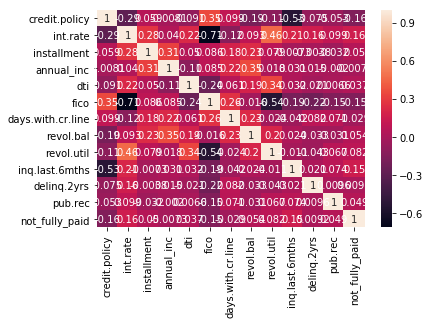

In [10]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [11]:
data.corr()

,credit.policy,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
credit.policy,1.000000,-0.294089,0.058770,-0.008058,-0.090901,0.348319,0.099146,-0.187518,-0.108826,-0.529739,-0.074800,-0.052695,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.039695,0.220006,-0.714821,-0.123658,0.092527,0.461748,0.207024,0.156674,0.098930,0.159552
installment,0.058770,0.276140,1.000000,0.313200,0.050202,0.086039,0.183456,0.233625,0.079363,-0.007336,-0.003848,-0.031902,0.049955
annual_inc,-0.008058,0.039695,0.313200,1.000000,-0.109063,0.085247,0.220161,0.353535,0.018292,0.030881,0.014640,-0.001959,-0.007254
dti,-0.090901,0.220006,0.050202,-0.109063,1.000000,-0.241191,0.060505,0.188748,0.335671,0.031645,-0.021409,0.006600,0.037362
fico,0.348319,-0.714821,0.086039,0.085247,-0.241191,1.000000,0.262884,-0.015553,-0.539157,-0.187565,-0.216339,-0.147340,-0.149666
days.with.cr.line,0.099146,-0.123658,0.183456,0.220161,0.060505,0.262884,1.000000,0.229589,-0.023942,-0.041890,0.081845,0.071448,-0.028778
revol.bal,-0.187518,0.092527,0.233625,0.353535,0.188748,-0.015553,0.229589,1.000000,0.202170,0.024188,-0.032875,-0.030651,0.053699
revol.util,-0.108826,0.461748,0.079363,0.018292,0.335671,-0.539157,-0.023942,0.202170,1.000000,-0.011346,-0.042742,0.067336,0.081720
inq.last.6mths,-0.529739,0.207024,-0.007336,0.030881,0.031645,-0.187565,-0.041890,0.024188,-0.011346,1.000000,0.021413,0.074157,0.149899


In [12]:
data_new = pd.get_dummies(data,drop_first=True)
data_new.head()

,credit.policy,int.rate,installment,annual_inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.00038,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.00007,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.99994,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.00038,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.99964,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,1,0,0,0,0,0


In [13]:
data_new.shape

(9578, 19)

In [14]:
data_new.columns

Index(['credit.policy', 'int.rate', 'installment', 'annual_inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'not_fully_paid', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [15]:
x=data_new.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18]]
y=data_new.iloc[:,12]

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=1)

In [17]:
logreg= LogisticRegression()

In [18]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicting for train

In [19]:
pred_train= logreg.predict(x_train)
pd.crosstab(y_train,pred_train)

col_0,0,1
not_fully_paid,,
0,5647,1
1,1055,1


In [20]:
tn= 5647
fp=1
fn=1055
tp=1

accuracy=round((tn+tp)/(tn+tp+fn+fp),3)
error= round(1- accuracy,3)
sensi= round(tp/(tp+fn),3)
prec = round(tp/(tp+fp),3)
speci = round(tn/(tn+fp),3)

print('Accuracy = ', accuracy, '\nError = ', error, '\nSensitivity = ', sensi,'\nPrecision = ',prec,'\nSpecificity =', speci)

Accuracy =  0.842 
Error =  0.158 
Sensitivity =  0.001 
Precision =  0.5 
Specificity = 1.0


Predicting for test

In [21]:
pred_test= logreg.predict(x_test)
pd.crosstab(y_test,pred_test)

col_0,0
not_fully_paid,
0,2397
1,477


In [22]:
tn= 2397
fp=0
fn=477
tp=0

accuracy=round((tn+tp)/(tn+tp+fn+fp),3)
error= round(1- accuracy,3)
sensi= round(tp/(tp+fn),3)
prec = round(tp/(tp+fp+1),3)
speci = round(tn/(tn+fp),3)

print('Accuracy = ', accuracy, '\nError = ', error, '\nSensitivity = ', sensi,'\nPrecision = ',prec,'\nSpecificity =', speci)

Accuracy =  0.834 
Error =  0.166 
Sensitivity =  0.0 
Precision =  0.0 
Specificity = 1.0


Using Probability for threshold

In [23]:
pred_train2= logreg.predict_proba(x_train)

In [24]:
predlist=[]

for i in pred_train2[:,1]:
    if  i >= 0.40:
        predlist.append(1)
    else:
        predlist.append(0)
        
predarr= np.array(predlist)

In [25]:
pd.crosstab(y_train,predarr)

col_0,0,1
not_fully_paid,,
0,5646,2
1,1055,1


In [26]:
tn= 5646
fp=2
fn=1055
tp=1

accuracy=round((tn+tp)/(tn+tp+fn+fp),3)
error= round(1- accuracy,3)
sensi= round(tp/(tp+fn),3)
prec = round(tp/(tp+fp),3)
speci = round(tn/(tn+fp),3)

print('Accuracy = ', accuracy, '\nError = ', error, '\nSensitivity = ', sensi,'\nPrecision = ',prec,'\nSpecificity =', speci)

Accuracy =  0.842 
Error =  0.158 
Sensitivity =  0.001 
Precision =  0.333 
Specificity = 1.0


In [27]:
x2= add_constant(x_train)

In [37]:
type(y_train)

pandas.core.series.Series

In [28]:
logit= sm.Logit(y_train,x2)

In [29]:
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.407728
         Iterations 6


In [30]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:         not_fully_paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6685
Method:                           MLE   Df Model:                           18
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:                 0.06384
Time:                        13:17:09   Log-Likelihood:                -2733.4
converged:                       True   LL-Null:                       -2919.8
                                        LLR p-value:                 4.252e-68
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          5.2539      1.346      3.905      0.000       2.617       7.891
credit.policy                 -0.4359      0.098     -4.437      0.000      -0.628 

In [31]:
tn= 5647
fp=1
fn=1055
tp=1

accuracy=round((tn+tp)/(tn+tp+fn+fp),3)
error= round(1- accuracy,3)
sensi= round(tp/(tp+fn),3)
prec = round(tp/(tp+fp),3)
speci = round(tn/(tn+fp),3)

print('Accuracy = ', accuracy, '\nError = ', error, '\nSensitivity = ', sensi,'\nPrecision = ',prec,'\nSpecificity =', speci)

Accuracy =  0.842 
Error =  0.158 
Sensitivity =  0.001 
Precision =  0.5 
Specificity = 1.0


In [32]:
data_new.groupby('not_fully_paid')['int.rate','pub.rec','inq.last.6mths'].agg([np.mean,np.std])

int.rate             pub.rec           inq.last.6mths  \
                    mean       std      mean       std           mean   
not_fully_paid                                                          
0               0.120770  0.026692  0.056308  0.255105       1.426227   
1               0.132452  0.025495  0.091324  0.292659       2.323549   

                          
                     std  
not_fully_paid            
0               1.993009  
1               2.930162

In [33]:
pred_test= logreg.predict_proba(x_test)

In [34]:
fpr,tpr,thresold= metrics.roc_curve(y_test, pred_test[:,1])

C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

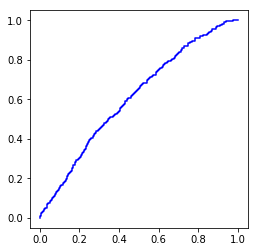

In [35]:
plt.plot(fpr,tpr, label='ROC Curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])